In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('Datos_limpios.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   21528 non-null  int64  
 1   last_scraped                 21528 non-null  object 
 2   name                         21528 non-null  object 
 3   description                  21528 non-null  object 
 4   neighborhood_overview        21528 non-null  object 
 5   host_location                21528 non-null  object 
 6   host_response_time           21528 non-null  object 
 7   host_is_superhost            21528 non-null  object 
 8   host_verifications           21528 non-null  object 
 9   host_has_profile_pic         21528 non-null  object 
 10  host_identity_verified       21528 non-null  object 
 11  neighbourhood                21528 non-null  object 
 12  property_type                21528 non-null  object 
 13  room_type       

In [4]:
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar DataFrame para mantener solo esas columnas
df = df[columnas_a_conservar]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      21528 non-null  object 
 1   room_type                  21528 non-null  object 
 2   review_scores_cleanliness  21528 non-null  float64
 3   host_acceptance_rate       21528 non-null  float64
 4   host_identity_verified     21528 non-null  object 
 5   host_is_superhost          21528 non-null  object 
 6   instant_bookable           21528 non-null  object 
 7   accommodates               21528 non-null  float64
 8   bathrooms                  21528 non-null  float64
 9   property_type              21528 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.6+ MB


In [6]:
df=df
df['room_type'] = df['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


In [7]:
import re
df['price']= df['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [8]:
sorted_values = df['price'].sort_values(ascending=True)
sorted_values

11505       100.0
12190       100.0
12191       100.0
8630        100.0
12195       100.0
           ...   
15431     39899.0
7187      41800.0
5305      62000.0
19948     74580.0
12962    100000.0
Name: price, Length: 21528, dtype: float64

In [9]:
df = df[df['price'] <40000]

In [10]:
df1 = df[df["room_type"] ==3]

In [11]:

Y= df1['price']
X1= df1['room_type'].to_frame()

In [12]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [13]:
type(model)

sklearn.linear_model._base.LinearRegression

In [14]:
model.fit(X=X1, y=Y)

LinearRegression()

In [15]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(278.2)}

In [16]:

y_pred= model.predict(X=X1)
y_pred

array([278.2, 278.2, 278.2, 278.2, 278.2, 278.2, 278.2, 278.2, 278.2,
       278.2, 278.2, 278.2, 278.2, 278.2, 278.2, 278.2, 278.2, 278.2,
       278.2, 278.2, 278.2, 278.2, 278.2, 278.2, 278.2])

<Axes: xlabel='room_type', ylabel='price'>

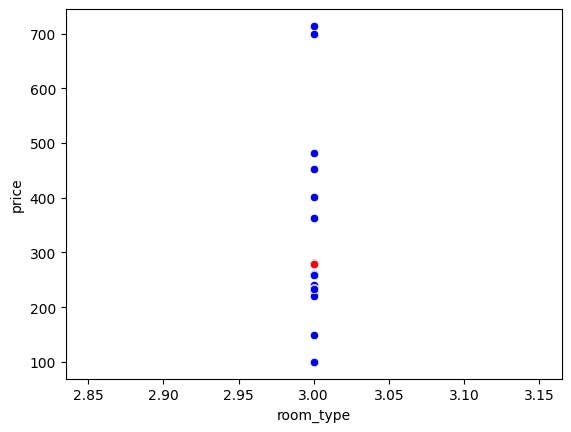

In [17]:
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y=y_pred, color="red", data=df1)

In [18]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.0

In [19]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [20]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 81 to 21257
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      25 non-null     float64
 1   room_type                  25 non-null     int64  
 2   review_scores_cleanliness  25 non-null     float64
 3   host_acceptance_rate       25 non-null     float64
 4   host_identity_verified     25 non-null     object 
 5   host_is_superhost          25 non-null     object 
 6   instant_bookable           25 non-null     object 
 7   accommodates               25 non-null     float64
 8   bathrooms                  25 non-null     float64
 9   property_type              25 non-null     object 
dtypes: float64(5), int64(1), object(4)
memory usage: 2.1+ KB


In [21]:

Y2= df1['price']
X2= df1['host_acceptance_rate'].to_frame()

In [22]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [23]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [24]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.76220241]),
 'rank_': 1,
 'singular_': array([95.39308151]),
 'intercept_': np.float64(40.429616344902854)}

In [25]:
y_pred2= model2.predict(X=X2)
y_pred2

array([225.49717797, 277.97902381, 225.49717797, 225.49717797,
       225.49717797, 225.49717797, 313.88765517, 313.88765517,
       313.88765517, 316.64985758, 313.88765517, 316.64985758,
       208.9239635 , 225.49717797, 313.88765517, 311.12545276,
       311.12545276, 297.31444069, 109.48467665, 313.88765517,
       313.88765517, 313.88765517, 313.88765517, 313.88765517,
       313.88765517])

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

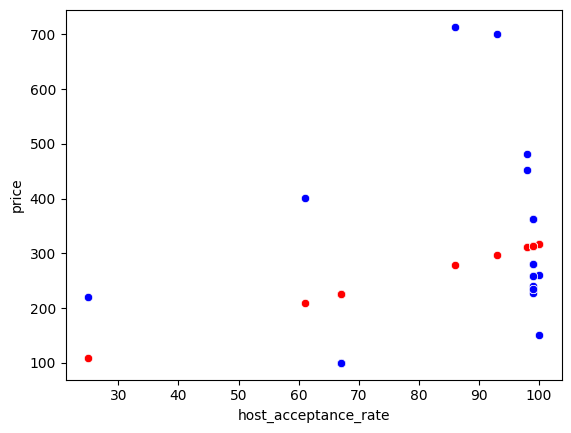

In [26]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y=y_pred2, color="red", data=df1)

In [27]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.10059114097017097

In [28]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.31716106471345273)

In [29]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\blanf\AppData\Local\Temp\ipykernel_33392\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\blanf\AppData\Local\Temp\ipykernel_33392\4038004741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


In [30]:

Y3= df1['price']
X3= df1['host_is_superhost'].to_frame()

In [31]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [32]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [33]:
y_pred3= model3.predict(X=X3)
y_pred3

array([260. , 487.5, 260. , 260. , 260. , 260. , 260. , 260. , 260. ,
       260. , 260. , 487.5, 260. , 260. , 260. , 260. , 260. , 260. ,
       260. , 260. , 260. , 260. , 260. , 260. , 260. ])

<Axes: xlabel='host_is_superhost', ylabel='price'>

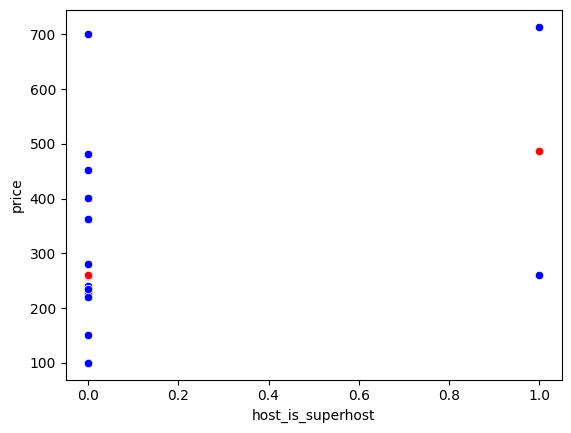

In [34]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred3, color="red", data=df1)

In [35]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

0.13797347497015422

In [36]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.37144780921436893)

In [37]:

Y4= df1['accommodates']
X4= df1['bathrooms'].to_frame()

In [38]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [39]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [40]:
y_pred4= model4.predict(X=X4)
y_pred4

array([1.62, 1.62, 1.62, 1.62, 1.62, 1.62, 1.62, 1.  , 1.  , 1.62, 1.  ,
       1.62, 1.62, 1.62, 1.62, 1.62, 1.62, 1.62, 1.62, 1.62, 1.  , 1.62,
       1.  , 1.62, 1.62])

<Axes: xlabel='bathrooms', ylabel='accommodates'>

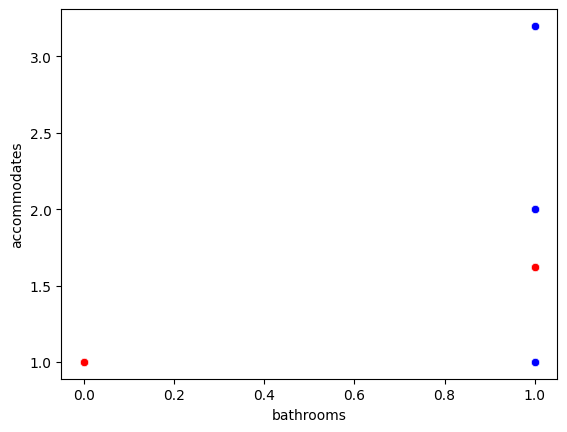

In [41]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred4, color="red", data=df1)

In [42]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.133361087982237

In [43]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.36518637431075796)

In [44]:

Y5= df1['price']
X5= df1['review_scores_cleanliness'].to_frame()

In [45]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [46]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [47]:
y_pred5= model5.predict(X=X5)
y_pred5

array([254.02100988, 295.58836114, 224.88501601, 302.58099967,
       295.58836114, 295.58836114, 272.66804596, 274.99892547,
       287.81876278, 283.93396359, 259.07124882, 289.37268245,
       299.08468041, 292.86900172, 271.50260621, 266.84084719,
       251.30165045, 295.58836114, 186.03702418, 302.58099967,
       263.73300784, 295.58836114, 295.58836114, 302.58099967,
       295.58836114])

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

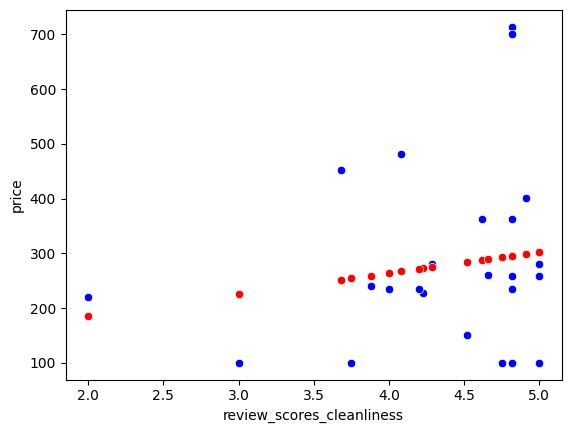

In [48]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y=y_pred5, color="red", data=df1)

In [49]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

0.026420637351451393

In [50]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.16254426274541772)

In [51]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\blanf\AppData\Local\Temp\ipykernel_33392\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})
C:\Users\blanf\AppData\Local\Temp\ipykernel_33392\3355181784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


In [52]:

Y6= df1['price']
X6= df1['host_identity_verified'].to_frame()

In [53]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [54]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [55]:
y_pred6= model6.predict(X=X6)
y_pred6

array([100. , 302.5, 100. , 302.5, 100. , 302.5, 302.5, 302.5, 302.5,
       302.5, 302.5, 302.5, 302.5, 302.5, 302.5, 302.5, 302.5, 302.5,
       302.5, 302.5, 302.5, 302.5, 302.5, 302.5, 302.5])

<Axes: xlabel='host_identity_verified', ylabel='price'>

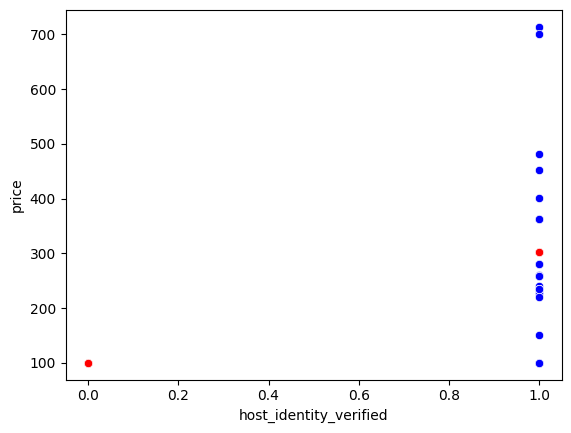

In [56]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y=y_pred6, color="red", data=df1)

In [57]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

0.15684437915087446

In [58]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.3960358306402016)

In [59]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\blanf\AppData\Local\Temp\ipykernel_33392\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})
C:\Users\blanf\AppData\Local\Temp\ipykernel_33392\1876949163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


In [60]:

Y7= df1['price']
X7= df1['instant_bookable'].to_frame()

In [61]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [62]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [63]:
y_pred7= model7.predict(X=X7)
y_pred7

array([263.5, 263.5, 263.5, 263.5, 263.5, 263.5, 288. , 288. , 288. ,
       288. , 288. , 288. , 263.5, 263.5, 288. , 288. , 288. , 263.5,
       263.5, 288. , 288. , 288. , 288. , 288. , 288. ])

<Axes: xlabel='instant_bookable', ylabel='price'>

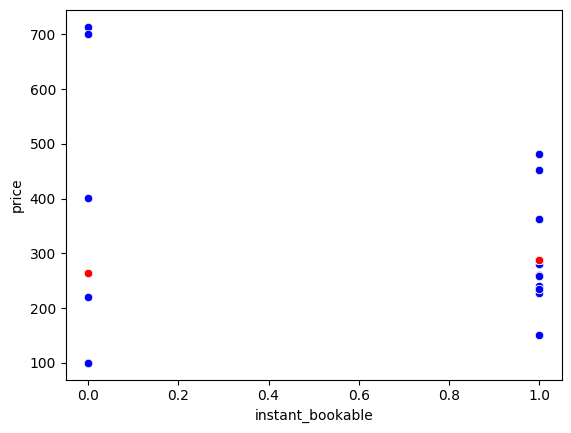

In [64]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y=y_pred7, color="red", data=df1)

In [65]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

0.005217931777878215

In [66]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.0722352530131806)

In [67]:
df1['property_type'] = df1['property_type'].replace({
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Private room in rental unit': 3,
    'Entire home': 4,
    'Private room in condo': 5,
    'Entire townhouse': 6,
    'Private room in home': 7,
    'Entire villa': 8,
    'Entire loft': 9,
    'Private room in villa': 10,
    'Entire serviced apartment': 11,
    'Private room in townhouse': 12,
    'Room in hotel': 13,
    'Entire guesthouse': 14,
    'Private room in bed and breakfast': 15,
    'Room in aparthotel': 16,
    'Private room in guest suite': 17,
    'Private room in casa particular': 18,
    'Shared room in hotel': 19,
    'Private room in guesthouse': 20,
    'Tiny home': 21,
    'Shared room in hostel': 22,
    'Private room in serviced apartment': 23,
    'Private room in boat': 24,
    'Houseboat': 25,
    'Entire guest suite': 26,
    'Boat': 27,
    'Shared room in rental unit': 28,
    'Shared room in condo': 29,
    'Private room in loft': 30,
    'Private room': 31,
    'Private room in bungalow': 32,
    'Private room in hostel': 33,
    'Entire bungalow': 34,
    'Entire vacation home': 35,
    'Entire cabin': 36,
    'Private room in shipping container': 37,
    'Room in hostel': 38,
    'Camper/RV': 39,
    'Entire place': 40,
    'Barn': 41,
    'Casa particular': 42,
    'Entire cottage': 43,
    'Private room in hut': 44,
    'Shared room in bungalow': 45,
    'Private room in tiny home': 46,
    'Shared room in bed and breakfast': 47,
    'Private room in vacation home': 48,
    'Hut': 49,
    'Private room in barn': 50,
    'Minsu': 51,
    'Shipping container': 52,
    'Private room in cabin': 53,
    'Tower': 54,
    'Dome': 55,
    'Farm stay': 56,
     'Tent': 57

})


C:\Users\blanf\AppData\Local\Temp\ipykernel_33392\2162765534.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({
C:\Users\blanf\AppData\Local\Temp\ipykernel_33392\2162765534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['property_type'] = df1['property_type'].replace({


In [68]:

Y8= df1['price']
X8= df1['property_type'].to_frame()

In [69]:
df1['property_type'] = df1['property_type'].replace({...}).astype(float)

C:\Users\blanf\AppData\Local\Temp\ipykernel_33392\1373559198.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df1['property_type'] = df1['property_type'].replace({...}).astype(float)
C:\Users\blanf\AppData\Local\Temp\ipykernel_33392\1373559198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['property_type'] = df1['property_type'].replace({...}).astype(float)


In [70]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [71]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [72]:
y_pred8= model8.predict(X=X8)
y_pred8

array([260.23059867, 254.15985498, 260.23059867, 254.15985498,
       157.02795589, 144.88646851, 296.65506083, 296.65506083,
       296.65506083, 296.65506083, 296.65506083, 296.65506083,
       254.15985498, 254.15985498, 296.65506083, 314.8672919 ,
       314.8672919 , 260.23059867, 260.23059867, 314.8672919 ,
       314.8672919 , 314.8672919 , 314.8672919 , 314.8672919 ,
       314.8672919 ])

<Axes: xlabel='property_type', ylabel='price'>

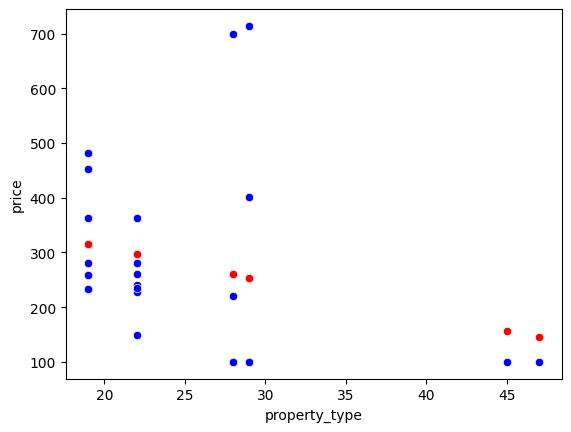

In [73]:
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y=y_pred8, color="red", data=df1)

In [74]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.07127989069267926

In [75]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.2669829408270859)

In [76]:
df1 = df1.drop('room_type', axis=1)

In [80]:
Corr_Factors=df1.corr()
Corr_Factors

,Predicción_Host_acceptance_rate,Predicción_Host_is_superhost,Predicción_accommodates,Predicción_review_scores_cleanliness,Predicción_host_identity_verified,Predicción_instant_bookable,Predicción_property_type,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
Predicción_Host_acceptance_rate,1.000000,0.106957,-0.338599,0.455567,0.369301,0.829395,0.636107,0.317161,0.455567,1.000000,0.369301,0.106957,0.829395,-0.161749,-0.338599,-0.636107
Predicción_Host_is_superhost,0.106957,1.000000,0.147442,0.155920,0.108893,-0.060193,-0.018563,0.371448,0.155920,0.106957,0.108893,1.000000,-0.060193,0.479383,0.147442,0.018563
Predicción_accommodates,-0.338599,0.147442,1.000000,0.036247,-0.184637,-0.408248,-0.290116,0.009028,0.036247,-0.338599,-0.184637,0.147442,-0.408248,0.365186,1.000000,0.290116
Predicción_review_scores_cleanliness,0.455567,0.155920,0.036247,1.000000,0.273936,0.121437,-0.064387,0.162544,1.000000,0.455567,0.273936,0.155920,0.121437,-0.243302,0.036247,0.064387
Predicción_host_identity_verified,0.369301,0.108893,-0.184637,0.273936,1.000000,0.452267,0.435941,0.396036,0.273936,0.369301,1.000000,0.108893,0.452267,-0.274058,-0.184637,-0.435941
Predicción_instant_bookable,0.829395,-0.060193,-0.408248,0.121437,0.452267,1.000000,0.777677,0.072235,0.121437,0.829395,0.452267,-0.060193,1.000000,-0.125040,-0.408248,-0.777677
Predicción_property_type,0.636107,-0.018563,-0.290116,-0.064387,0.435941,0.777677,1.000000,0.266983,-0.064387,0.636107,0.435941,-0.018563,0.777677,-0.091115,-0.290116,-1.000000
price,0.317161,0.371448,0.009028,0.162544,0.396036,0.072235,0.266983,1.000000,0.162544,0.317161,0.396036,0.371448,0.072235,-0.098363,0.009028,-0.266983
review_scores_cleanliness,0.455567,0.155920,0.036247,1.000000,0.273936,0.121437,-0.064387,0.162544,1.000000,0.455567,0.273936,0.155920,0.121437,-0.243302,0.036247,0.064387
host_acceptance_rate,1.000000,0.106957,-0.338599,0.455567,0.369301,0.829395,0.636107,0.317161,0.455567,1.000000,0.369301,0.106957,0.829395,-0.161749,-0.338599,-0.636107


In [78]:

df1.insert(0, 'Predicción_Host_acceptance_rate', y_pred2)
df1.insert(1, 'Predicción_Host_is_superhost', y_pred3)
df1.insert(2, 'Predicción_accommodates', y_pred4)
df1.insert(3, 'Predicción_review_scores_cleanliness', y_pred5)
df1.insert(4, 'Predicción_host_identity_verified', y_pred6)
df1.insert(5, 'Predicción_instant_bookable', y_pred7)
df1.insert(6, 'Predicción_property_type', y_pred8)

In [81]:
#Convierte todo a positivo :(
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicción_Host_acceptance_rate,Predicción_Host_is_superhost,Predicción_accommodates,Predicción_review_scores_cleanliness,Predicción_host_identity_verified,Predicción_instant_bookable,Predicción_property_type,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
Predicción_Host_acceptance_rate,1.000000,0.106957,0.338599,0.455567,0.369301,0.829395,0.636107,0.317161,0.455567,1.000000,0.369301,0.106957,0.829395,0.161749,0.338599,0.636107
Predicción_Host_is_superhost,0.106957,1.000000,0.147442,0.155920,0.108893,0.060193,0.018563,0.371448,0.155920,0.106957,0.108893,1.000000,0.060193,0.479383,0.147442,0.018563
Predicción_accommodates,0.338599,0.147442,1.000000,0.036247,0.184637,0.408248,0.290116,0.009028,0.036247,0.338599,0.184637,0.147442,0.408248,0.365186,1.000000,0.290116
Predicción_review_scores_cleanliness,0.455567,0.155920,0.036247,1.000000,0.273936,0.121437,0.064387,0.162544,1.000000,0.455567,0.273936,0.155920,0.121437,0.243302,0.036247,0.064387
Predicción_host_identity_verified,0.369301,0.108893,0.184637,0.273936,1.000000,0.452267,0.435941,0.396036,0.273936,0.369301,1.000000,0.108893,0.452267,0.274058,0.184637,0.435941
Predicción_instant_bookable,0.829395,0.060193,0.408248,0.121437,0.452267,1.000000,0.777677,0.072235,0.121437,0.829395,0.452267,0.060193,1.000000,0.125040,0.408248,0.777677
Predicción_property_type,0.636107,0.018563,0.290116,0.064387,0.435941,0.777677,1.000000,0.266983,0.064387,0.636107,0.435941,0.018563,0.777677,0.091115,0.290116,1.000000
price,0.317161,0.371448,0.009028,0.162544,0.396036,0.072235,0.266983,1.000000,0.162544,0.317161,0.396036,0.371448,0.072235,0.098363,0.009028,0.266983
review_scores_cleanliness,0.455567,0.155920,0.036247,1.000000,0.273936,0.121437,0.064387,0.162544,1.000000,0.455567,0.273936,0.155920,0.121437,0.243302,0.036247,0.064387
host_acceptance_rate,1.000000,0.106957,0.338599,0.455567,0.369301,0.829395,0.636107,0.317161,0.455567,1.000000,0.369301,0.106957,0.829395,0.161749,0.338599,0.636107


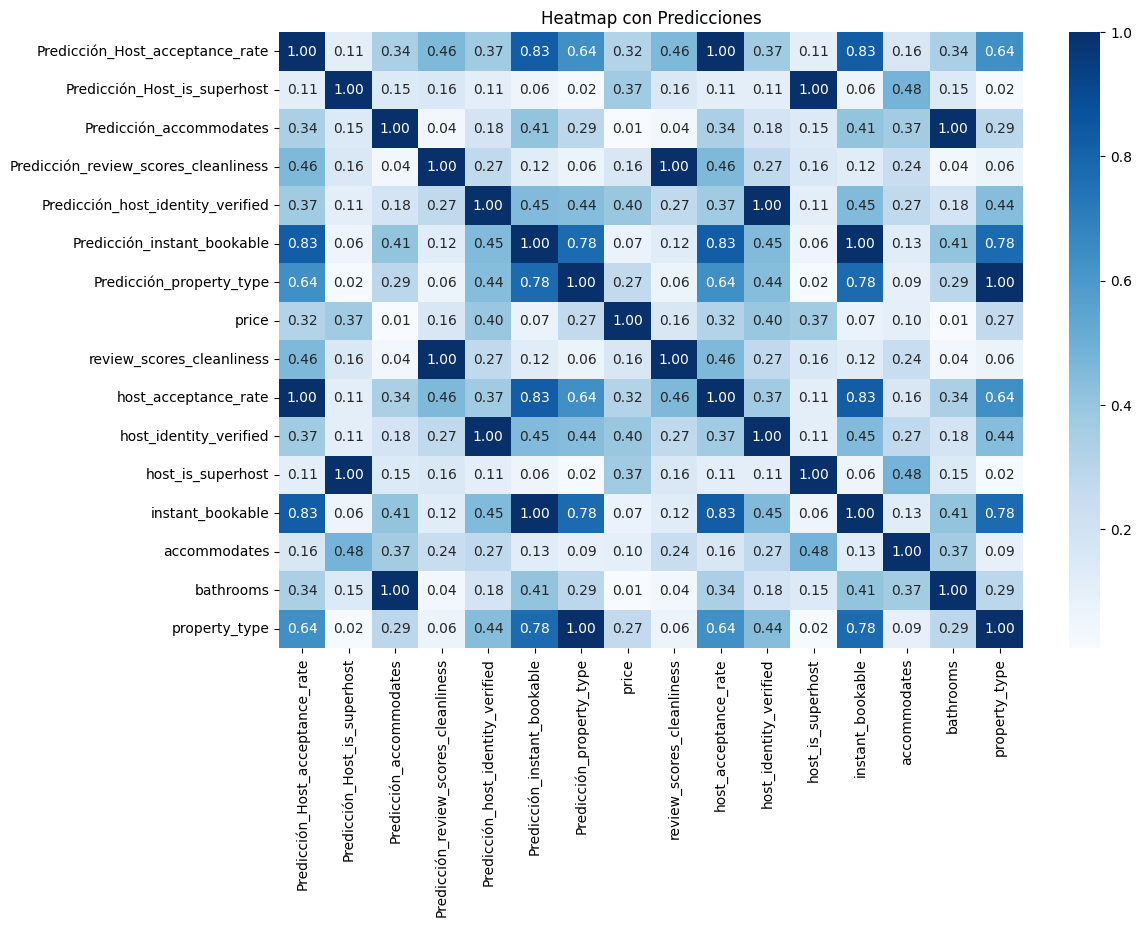

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()
